In [3]:
import numpy as np

## 1. Initialize parameters
- Weights and biases are parameters that model connections between different layers
- Define parameter shape: keep the implementation as close as possible to the mathmatical calculations

In [4]:
def create_weight_matrix(nrows, ncols):
    # return np.zeros((nrows, ncols))
    return np.random.default_rng().normal(loc=0, scale=1/(nrows * ncols), size=(nrows, ncols))

def create_bias_vector(nrows):
    """create a column vector as a matrix"""
    # return np.zeros((nrows, 1))
    return create_weight_matrix(nrows, 1)


In [5]:
nrows = 2 # output number
ncols = 4 # input number

W = create_weight_matrix(nrows, ncols)
b = create_bias_vector(nrows)

print("rows:", nrows)
print("cols:", ncols)
print()
print("weight W:\n", W)
print("W.shape:", W.shape)
print()
print("bias b:\n", b)
print("b.shape:", b.shape)

rows: 2
cols: 4

weight W:
 [[ 0.03121503 -0.17317434 -0.046923    0.04133939]
 [-0.04869844 -0.05028882 -0.30021962  0.03374637]]
W.shape: (2, 4)

bias b:
 [[-0.19502045]
 [ 0.21662013]]
b.shape: (2, 1)


## 2. Update neuron states

In [6]:
x = np.array((1, 0, 0, 0), ndmin=2).T

print("input x:\n", x)
print("x.shape:", x.shape)

input x:
 [[1]
 [0]
 [0]
 [0]]
x.shape: (4, 1)


In [7]:
z = np.dot(W, x) + b

print("z :\n", z)
print("z.shape:", z.shape)

z :
 [[-0.16380542]
 [ 0.16792169]]
z.shape: (2, 1)


### Activation function

In [8]:
def leaky_relu(x, leaky_param=0.1):
    return np.maximum(x, x * leaky_param)

In [9]:
a = leaky_relu(z)

print("a:\n", a)
print("a.shape:", a.shape)

a:
 [[-0.01638054]
 [ 0.16792169]]
a.shape: (2, 1)


## 3. Modelling layers

In [10]:
class Layer:
    """
    Layer class that represents the connections and the flow of information between a column of neurons and the next.
    It deals with what happens in between two columns of neurons instead of having the layer specifially represent the neurons of each vertical column
    """
    def __init__(self, ins, outs, act_function) -> None:
        self.ins = ins
        self.outs = outs
        self.act_function = act_function

        self._W = create_weight_matrix(self.outs, self.ins)
        self._b = create_bias_vector(self.outs)

    def forward(self, x):
        """
        helper method that computes the forward pass in the layer

        Parameters:
        x: a set of neuron states

        Returns:
        the next set of neuron states
        """
        return self.act_function(np.dot(self._W, x) + self._b)

#### Demo

In [11]:
def main():
    """
    Demo of chaining layers with compatible shapes.
    """
    l1 = Layer(2, 4, leaky_relu)
    l2 = Layer(4, 4, leaky_relu)
    l3 = Layer(4, 1, leaky_relu)

    x = np.random.uniform(size=(2, 1))
    print("x:\n", x)
    print("x.shape:", x.shape)
    output = l3.forward(l2.forward(l1.forward(x)))
    print("\noutput:\n", output)

main()

x:
 [[0.04093571]
 [0.69791626]]
x.shape: (2, 1)

output:
 [[0.97513189]]


# Network and Loss

In [12]:
class NeuralNet:
    """
    A series of layers connected and compatible.
    """
    def __init__(self, layers) -> None:
        self._layers = layers
        self.check_layer_compatibility()

    def check_layer_compatibility(self):
        for from_, to_ in zip(self._layers[:-1], self._layers[1:]):
            print("from, to:", from_.ins, to_.ins)
            if from_.outs != to_.ins:
                raise ValueError("Layers should have compatible shapes.")

    def forward(self, x):
        out = x
        for layer in self._layers:
            out = layer.forward(out)
        return out

    def loss(self, y_pred, y):
        return self._loss_function(y_pred, y)


#### Demo

In [13]:
def generic_demo():
    """
    Demo of a network as a serias of layers.
    """
    net = NeuralNet(
        [
            Layer(2, 4, leaky_relu),
            Layer(4, 4, leaky_relu),
            Layer(4, 1, leaky_relu),
        ]
    )

    x = np.random.uniform(size=(2, 1))
    print("x:\n", x)
    print("x.shape:", x.shape)
    output = net.forward(x) 
    print("\noutput:\n", output)

generic_demo()

from, to: 2 4
from, to: 4 4
x:
 [[0.05269483]
 [0.23093274]]
x.shape: (2, 1)

output:
 [[-0.16358343]]


In [ ]:
# Layer compatibility test
net = NeuralNet(
    [
        Layer(2, 4, leaky_relu),
        Layer(5, 1, leaky_relu),
    ]
)

## Evaluate performance - Loss

In [15]:
def MSE(y_pred, y):
    return np.mean((y_pred - y) ** 2)

In [16]:
class NeuralNet:
    """
    A series of layers connected and compatible.
    """
    def __init__(self, layers, loss_function) -> None:
        self._layers = layers
        self._loss_function = loss_function
        self.check_layer_compatibility()

    def check_layer_compatibility(self):
        for from_, to_ in zip(self._layers[:-1], self._layers[1:]):
            print("from, to:", from_.ins, to_.ins)
            if from_.outs != to_.ins:
                raise ValueError("Layers should have compatible shapes.")

    def forward(self, x):
        out = x
        for layer in self._layers:
            out = layer.forward(out)
        return out

    def loss(self, y_pred, y):
        return self._loss_function(y_pred, y)

### Derivative of activation function

In [17]:
def d_leaky_relu(x, leaky_param=0.1):
    return np.maximum(x > 0, leaky_param)

In [18]:
x = np.array([-2, -1, 3, 4])
x
d_leaky_relu(x)

array([0.1, 0.1, 1. , 1. ])

### Derivative of loss function

In [19]:
def MSE_derivative(y_pred, y):
    return 2 * (y_pred - y) / y_pred.size

In [22]:
x = np.array([1,2,3,4])
x
t = np.zeros(shape=4)
t
MSE_derivative(x, t)

array([0.5, 1. , 1.5, 2. ])

### Generic Activation class

In [40]:
from abc import abstractmethod

class Activation:
    """
    Class to be inherited by activation functions.
    """
    @abstractmethod
    def f(self, x):
        """
        Method that implements the function.
        """
        pass

    @abstractmethod
    def df(self, x):
        """
        Derivative of the function with respect to its input.
        """
        pass

In [59]:
class LeakyRelu(Activation):
    """
    Leaky Rectified Linear Unit.
    """
    def __init__(self, leaky_param=0.1):
        self.alpha = leaky_param

    def f(self, x):
        return np.maximum(x, x * self.alpha)

    def df(self, x):
        return np.maximum(x > 0, self.alpha)

### Generic Loss class

In [29]:
class Loss:
    """
    Class to be inherited by loss functions.
    """
    @abstractmethod
    def loss(self, y_pred, y):
        """
        """
        pass

    @abstractmethod
    def dloss(self, y_pred, y):
        pass

In [36]:
class MSE(Loss):
    def loss(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def dloss(self, y_pred, y):
        return 2 * (y_pred - y) / y_pred.size

### Update Layer and NeuralNet classes acorrding to Activation and Loss classes

In [75]:
class Layer:
    """
    Layer class that represents the connections and the flow of information between a column of neurons and the next.
    It deals with what happens in between two columns of neurons instead of having the layer specifially represent the neurons of each vertical column
    """
    def __init__(self, ins, outs, act_function) -> None:
        self.ins = ins
        self.outs = outs
        self.act_function = act_function

        self._W = create_weight_matrix(self.outs, self.ins)
        self._b = create_bias_vector(self.outs)

    def forward(self, x):
        """
        helper method that computes the forward pass in the layer

        Parameters:
        x: a set of neuron states

        Returns:
        the next set of neuron states
        """
        return self.act_function.f(np.dot(self._W, x) + self._b)

In [38]:
class NeuralNet:
    """
    A series of layers connected and compatible.
    """
    def __init__(self, layers, loss_function) -> None:
        self._layers = layers
        self._loss_function = loss_function
        self.check_layer_compatibility()

    def check_layer_compatibility(self):
        for from_, to_ in zip(self._layers[:-1], self._layers[1:]):
            print("from, to:", from_.ins, to_.ins)
            if from_.outs != to_.ins:
                raise ValueError("Layers should have compatible shapes.")

    def forward(self, x):
        out = x
        for layer in self._layers:
            out = layer.forward(out)
        return out

    def loss(self, y_pred, y):
        return self._loss_function.loss(y_pred, y)

#### Demo

In [45]:
def generic_loss_demo():
    """
    Demo of a network as a serias of layers.
    """
    net = NeuralNet(
        [
            Layer(2, 4, LeakyRelu()),
            Layer(4, 4, LeakyRelu()),
            Layer(4, 1, LeakyRelu()),
        ],
        MSE()
    )

    x = np.random.uniform(size=(2, 1))
    print("x:\n", x)
    print("x.shape:", x.shape)
    output = net.forward(x) 
    print("\noutput:\n", output)
    print("loss: ", net.loss(output, np.array(0, ndmin=2)))

generic_loss_demo()

from, to: 2 4
from, to: 4 4
x:
 [[0.92285153]
 [0.23715974]]
x.shape: (2, 1)

output:
 [[-0.23976225]]
loss:  0.05748593421802217


# Backpropagation

In [ ]:
class NeuralNet:
    """
    A series of layers connected and compatible.
    """
    def __init__(self, layers, loss_function) -> None:
        self._layers = layers
        self._loss_function = loss_function
        self.check_layer_compatibility()

    def check_layer_compatibility(self):
        for from_, to_ in zip(self._layers[:-1], self._layers[1:]):
            print("from, to:", from_.ins, to_.ins)
            if from_.outs != to_.ins:
                raise ValueError("Layers should have compatible shapes.")

    def forward(self, x):
        xs = [x]
        for layer in self._layers:
            xs.append(layer.forward(xs[-1]))
        return xs

    def loss(self, y_pred, y):
        return self._loss_function.loss(y_pred, y)

## 1. The chain rule

Unfold the recursive definition of $x_n$:
$$L(x_n, t) = L(f_{n - 1}(W_{n - 1} \cdot x_{n - 1} + b_{n - 1}), t)$$
$$= L(f_{n - 1}(W_{n - 1} \cdot f_{n - 2}(W_{n - 2} \cdot x_{n - 2} + b_{n - 2}) + b_{n - 1}), t) \\ = \dots $$

Taking the partial derivative of $L$ with respect to $W_0$ will involve many more chain rules than with respect to $W_{n - 1}$


In [48]:
net = NeuralNet(
    [
        Layer(2, 4, LeakyRelu()),
        Layer(4, 4, LeakyRelu()),
        Layer(4, 1, LeakyRelu()),
    ],
    MSE()
)
n = len(net._layers)


Ws = [layer._W for layer in net._layers]
bs = [layer._b for layer in net._layers]
fs = [layer.act_function.f for layer in net._layers]
dfs = [layer.act_function.df for layer in net._layers]

from, to: 2 4
from, to: 4 4


In [49]:
L = net._loss_function.loss
dL = net._loss_function.dloss

### First step
$$\frac {\partial L} {\partial x_{n - 1}}, \frac {\partial L} {\partial W_{n - 1}}, \frac {\partial L} {\partial b_{n - 1}}$$

$$y_{n - 1} = W_{n - 1} \cdot x_{n - 1} + b_{n - 1}$$
$$\frac {\partial L} {\partial b_{n - 1}} = dL(x_n, t) f^{'}_{n - 1}(y_{n - 1})$$
$$\frac {\partial L} {\partial x_{n - 1}} = W^{T}_{n - 1}\frac {\partial L} {\partial b_{n - 1}}$$
$$\frac {\partial L} {\partial W_{n - 1}} = \frac {\partial L} {\partial b_{n - 1}}x^{T}_{n - 1}$$

In [ ]:
loss = L(fs[n - 1](np.dot(Ws[n - 1], xs[n - 1]) + bs[n - 1]), t)

In [ ]:
y = np.dot(Ws[n - 1], xs[n - 1]) + bs[n - 1]

dbs[n - 1] = dfs[n - 1](y) * dL(xs[n], t)
dxs[n - 1] = np.dot(Ws[n - 1].T, dbs[n - 1])
dWs[n - 1] = np.dot(dbs[n - 1], xs[n - 1].T)

### Next step
#### Loss with dependence on xs[n - 2], Ws[n - 2] and bs[n - 2]

$$\frac {\partial L} {\partial x_{n - 2}}, \frac {\partial L} {\partial W_{n - 2}}, \frac {\partial L} {\partial b_{n - 2}}$$

$$y_{n - 2} = W_{n - 2} \cdot x_{n - 2} + b_{n - 2}$$
$$\frac {\partial L} {\partial b_{n - 2}} = \frac {\partial L} {\partial x_{n - 1}} \frac {\partial x_{n - 1}} {\partial b_{n - 2}} = \frac {\partial L} {\partial x_{n - 1}} f^{'}_{n - 2}(y_{n - 2})$$
$$\frac {\partial L} {\partial x_{n - 2}} = \frac {\partial L} {\partial x_{n - 1}} \frac {\partial x_{n - 1}} {\partial x_{n - 2}} = \frac {\partial L} {\partial x_{n - 1}} f^{'}_{n - 2}(y_{n - 2}) \frac {\partial y_{n - 2}} {\partial x_{n - 2}}= W^{T}_{n - 2}\frac {\partial L} {\partial b_{n - 2}}$$
$$\frac {\partial L} {\partial W_{n - 2}} = \frac {\partial L} {\partial x_{n - 1}} \frac {\partial x_{n - 1}} {\partial W_{n - 2}} = \frac {\partial L} {\partial b_{n - 2}}x^{T}_{n - 2}$$

In [ ]:
loss = L(fs[n - 1](
    np.dot(
        Ws[n - 1],
        fs[n - 2](
            np.dot(
                Ws[n - 2],
                xs[n - 2]
            ) + bs[n - 2]
        )
    ) + bs[n - 1]
), t)

In [ ]:
y = np.dot(Ws[n - 2], xs[n - 2]) + bs[n - 2]

dbs[n - 2] = dfs[n - 2](y) * dxs[n - 1]
dxs[n - 2] = np.dot(Ws[n - 2].T, dbs[n - 2])
dWs[n - 2] = np.dot(dbs[n - 2], xs[n - 2].T)

#### The General step

In [ ]:
y = np.dot(Ws[n - 3], xs[n - 3]) + bs[n - 3]

dbs[n - 3] = dfs[n - 3](y) * dL(xs[n - 2], t)
dxs[n - 3] = np.dot(Ws[n - 3].T, dbs[n - 3])
dWs[n - 3] = np.dot(dbs[n - 3], xs[n - 3].T)

In [ ]:
y = np.dot(Ws[0], xs[0]) + bs[0]

dbs[0] = dfs[0](y) * dL(xs[1], t)
dxs[0] = np.dot(Ws[0].T, dbs[0])
dWs[0] = np.dot(dbs[0], xs[0].T)

#### Generic loop

In [ ]:
dbs, dWs = [], []
dxs = [dL(xs[n], t)]

for x, W, b, f in reversed(list(zip(xs[:-1], Ws, bs, fs))):
    y = np.dot(W, x) + b
    dbs.append(f(y) * dxs[-1])
    dxs.append(np.dot(W.T, dbs[-1]))
    dWs.append(np.dot(dbs[-1], x.T))

$$\frac {\partial L} {\partial x_{n}} = dL(x_n, t)$$

$$\frac {\partial L} {\partial b_{n - i}} = \frac {\partial L} {\partial x_{n - i + 1}} f^{'}_{n - i}(x_{n - i} \cdot W_{n - i} + b_{n - i})$$
$$\frac {\partial L} {\partial x_{n - i}} = \frac {\partial L} {\partial x_{n - i + 1}} \frac {\partial x_{n - i + 1}} {\partial x_{n - i}} = \frac {\partial L} {\partial x_{n - i + 1}} f^{'}_{n - i}(y_{n - i}) \frac {\partial y_{n - i}} {\partial x_{n - i}}= W^{T}_{n - i}\frac {\partial L} {\partial b_{n - i}}$$
$$\frac {\partial L} {\partial W_{n - i}} = \frac {\partial L} {\partial x_{n - i + 1}} \frac {\partial x_{n - i + 1}} {\partial W_{n - i}} = \frac {\partial L} {\partial b_{n - i}}x^{T}_{n - i}$$

## 2. Training a neural network

In [98]:
class NeuralNet:
    """
    A series of layers connected and compatible.
    """
    def __init__(self, layers, loss_function, lr) -> None:
        self._layers = layers
        self._loss_function = loss_function
        self.lr = lr
        self.check_layer_compatibility()

    def check_layer_compatibility(self):
        for from_, to_ in zip(self._layers[:-1], self._layers[1:]):
            print("from, to:", from_.ins, to_.ins)
            if from_.outs != to_.ins:
                raise ValueError("Layers should have compatible shapes.")

    def forward(self, x):
        # xs = [x]
        # for layer in self._layers:
        #     xs.append(layer.forward(xs[-1]))
        # return xs
        out = x
        for layer in self._layers:
            out = layer.forward(out)
        return out

    def loss(self, y_pred, y):
        return self._loss_function.loss(y_pred, y)

    def train(self, x, t):
        """
        Train the network on input x and expected output t.
        """
        # Accumulate intermediate results during forward pass.
        xs = [x]
        for layer in self._layers:
            xs.append(layer.forward(xs[-1]))

        dx = self._loss_function.dloss(xs.pop(), t)
        for layer, x in zip(self._layers[::-1], xs[::-1]):

            # Compute the derivatives
            y = np.dot(layer._W, x) + layer._b
            db = layer.act_function.df(y) * dx
            dx = np.dot(layer._W.T, db)
            dW = np.dot(db, x.T)

            # Update parameters
            layer._W -= self.lr * dW
            layer._b -= self.lr * db

#### Demo

In [99]:
def generic_train_demo():
    """
    Demo of a network as a serias of layers.
    """
    net = NeuralNet(
        [
            Layer(2, 4, LeakyRelu()),
            Layer(4, 4, LeakyRelu()),
            Layer(4, 3, LeakyRelu()),
        ],
        MSE(), 0.001
    )
    t = np.zeros(shape=(3, 1))
    print("t:\n", t)


    loss = 0
    for _ in range(100):
        x = np.random.normal(size=(2, 1))
        loss += net.loss(net.forward(x)[-1], t)
    print("loss:\n", loss)

    for _ in range(10000):
        x = np.random.normal(size=(2, 1))
        net.train(x, t)

    loss = 0
    for _ in range(100):
        x = np.random.normal(size=(2, 1))
        loss += net.loss(net.forward(x)[-1], t)
    print("loss:\n", loss)

generic_train_demo()

from, to: 2 4
from, to: 4 4
t:
 [[0.]
 [0.]
 [0.]]
loss:
 0.0027822423382546893
loss:
 0.0024300008749493767


/tmp/ipykernel_9058/1281447791.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


from, to: 2 3
510
921


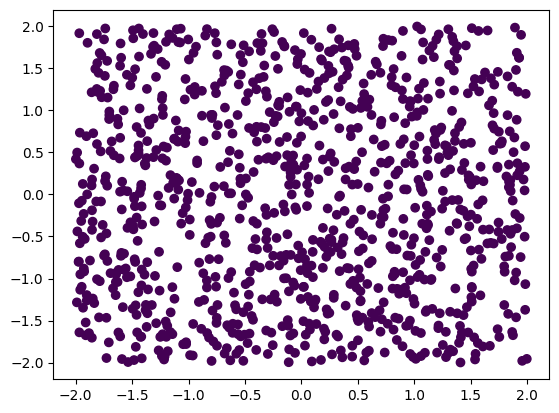

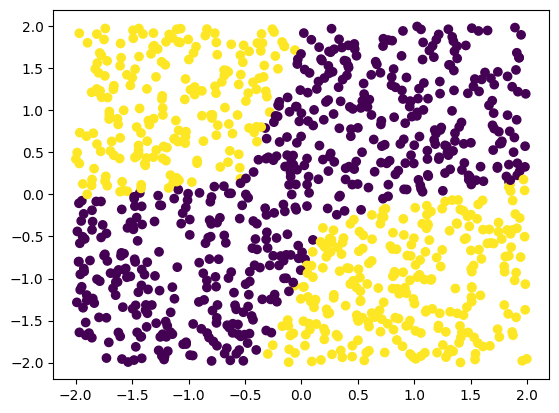

In [102]:
import sys, pathlib
import matplotlib.pyplot as plt
import numpy as np

def col(a):
    """Make sure the array is a column."""
    return np.atleast_2d(a).T

N = 100_000     # Create N points inside the square [-2,2]×[-2,2]
data = np.random.uniform(low=-2, high=2, size=(2, N))

ts = np.zeros(shape=(2, N))
ts[0, data[0,]*data[1,]>0] = 1
ts[1, :] = 1 - ts[0, :]

net = NeuralNet([
    Layer(2, 3, LeakyReLU()),
    Layer(3, 2, LeakyReLU()),
], MSELoss(), 0.05)

def assess(net, data, ts):
    correct = 0
    cs = []
    for i in range(data.shape[1]):
        out = net.forward(col(data[:, i]))
        guess = np.argmax(np.ndarray.flatten(out))
        if ts[guess, i]:
            correct += 1
        cs.append(guess)
    fig = plt.figure()
    plt.scatter(data[0, :1000], data[1, :1000], c=cs)
    fig.show()
    input()
    return correct

test_to = 1000
print(assess(net, data[:, :test_to], ts[:, :test_to]))
for i in range(test_to, N):
    net.train(col(data[:, i]), col(ts[:, i]))
print(assess(net, data[:, :test_to], ts[:, :test_to]))

# MNIST